In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os

# if os.path.isdir("/content/drive/MyDrive/ServeNet-master"):
#   os.chdir("/content/drive/MyDrive/ServeNet-master")
# else: 
#   !git clone https://github.com/yylonly/ServeNet.git
#   os.chdir("/content/drive/My Drive/ServeNet")

Mounted at /content/drive


In [ ]:
import json
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas.io.json import json_normalize
from pandas import HDFStore, read_hdf

%matplotlib inline 

## 1. Load from Text

In [ ]:
arr0=pd.read_csv('Data/appstore001.csv', usecols=['ServiceName','ServiceDescription','ServiceClassification'])

In [ ]:
arr0

,ServiceName,ServiceDescription,ServiceClassification
0,Computer Cabs Taxi App,Computer Cabs Taxi App \nFor booking Taxi’s an...,Travel
1,Computer Dictionary English,- 100% FREE Computer Dictionary with sound in ...,Reference
2,ComX VR - Comics and Manga,ComX VR is going to change the way you explore...,Book
3,Confession Planner,Confession Planner is intended for persons abo...,Reference
4,Confidence Bible Verses,Daily Confidence Bible Verses will give one Bi...,Book
...,...,...,...
78361,ParTown - Golf Competition,ParTown allows you to create a tournament that...,Sports
78362,Party 105,Party 105 is your home to listen to your favor...,Music
78363,Party 109 FM - The Perfect Hit Music Mix,Listen to the perfect hit music mix on your iP...,Music
78364,PARTY 96.3,"Listen at work, at the gym, on the road, or wh...",Music


In [ ]:
arr0['ServiceDescriptionLength'] = arr0['ServiceDescription'].str.len()
arr0.sort_values('ServiceDescriptionLength', ascending=True, inplace=True)

arr0[0:31]

,ServiceName,ServiceDescription,ServiceClassification,ServiceDescriptionLength
11124,CA CMS Client,CMS Client,Business,10
13265,CGF,CGF Portal,Sports,10
21716,NZ Team Hub,NZ Team Hub,Sports,11
2944,LASSP,LASSP ebook,Book,11
45192,FM 10 - 97.3,FM 10 - 97.3,Music,12
11403,Calibre Fusion,Led manager.,Business,12
21176,MV360,MV360 Client,Photo & Video,12
45203,FM Libre 92.7,FM Libre 92.7,Music,13
49104,MFM Shasha Region59 Lagos,Region59 Live,Music,13
48853,Master 97.3 FM,The Best Music,Music,14


## 2. Service Description to Vector

In [ ]:
import numpy as np
from math import *
from scipy import stats

### Keep data within confidence level 90%

In [ ]:
f = lambda x : len(x.split())
lens = arr0['ServiceDescription'].apply(f)

In [ ]:
mu = np.mean(lens)
mu #appstore001

155.84116380745246

In [ ]:
sigma = np.std(lens)
sigma

134.57130018891516

In [ ]:
interval = stats.norm.interval(0.9, mu, sigma) 
interval

(-65.50892739186006, 377.1912550067649)

### Historgram of Length Distribution 

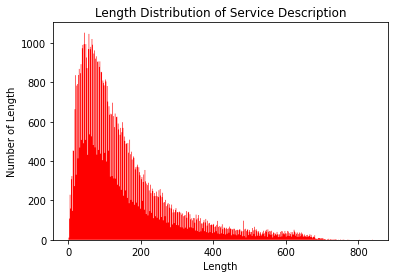

In [ ]:
plt.hist(lens, bins=500, facecolor='r',histtype='stepfilled')  
 
plt.xlabel('Length')
plt.ylabel('Number of Length')
plt.title('Length Distribution of Service Description')
plt.savefig('Data/HistogramDescriptionLength-source-26.pdf', format='pdf', dpi=300)

In [ ]:
len(arr0[(lens > 200)])

23085

In [ ]:
len(arr0[(lens > 350)])

8614

In [ ]:
len(arr0[(lens > 60)])

162960

In [ ]:
len(arr0[(lens > 110)])

178

In [ ]:
f = lambda x : len(x.split())
lens = arr0['ServiceName'].apply(f)

In [ ]:
len(arr0[(lens > 10)])

1237

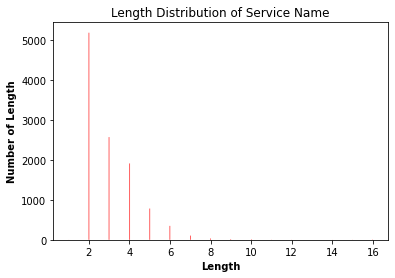

In [ ]:
plt.hist(lens, bins=500, facecolor='r',histtype='stepfilled')  
 
plt.xlabel('Length')
plt.ylabel('Number of Length')
plt.title('Length Distribution of Service Name')
plt.savefig('Data/HistogramNameLength.pdf', format='pdf', dpi=300)

In [ ]:
len(arr0[(lens > 10)])

4281

## Final Preview 

In [ ]:
arr0.shape

(13073, 3)

In [ ]:
labelcount = arr0['ServiceClassification'].value_counts()

In [ ]:
labelcount

Business             10000
Education            10000
Games                10000
Entertainment        10000
Finance               6673
Music                 6418
Book                  4495
Reference             3978
Photo & Video         3548
Travel                3339
Medical               2758
Sports                2103
Social Networking     2038
Food & Drink          1877
News                  1419
Health & Fitness      1180
Weather                128
Graphics & Design       68
Developer Tools         24
Name: ServiceClassification, dtype: int64

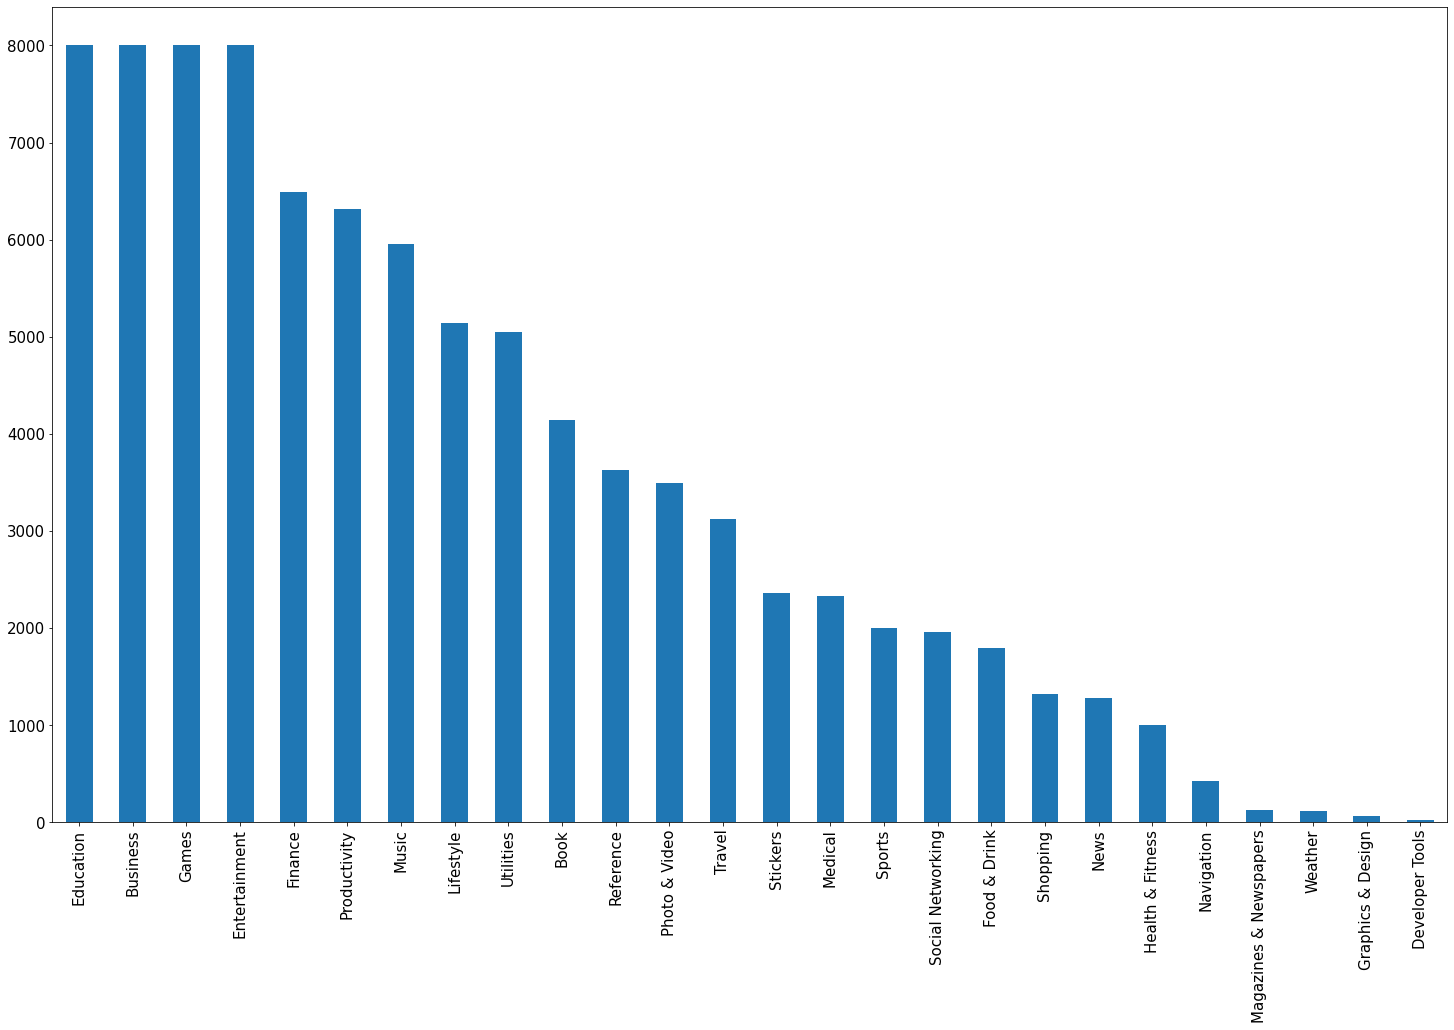

In [ ]:
plt.figure(figsize=(25, 15))
labelcount.plot(kind='bar', fontsize=15)
plt.savefig('Data/PostPrecessingHistogramTop50-26.pdf', format='pdf', dpi=300)
#source-26

## 5. Save to H5

In [ ]:
h5f = HDFStore('Data/AppWithName-26.h5')
h5f.put('AllData', arr0, format='table')
h5f.close()